In [29]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [30]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=19)  ### X is the data and y are cluster labels.

## Creating initial DataFrame

In [31]:
dict={}
points=list(X)
cluster=[0 for i in range(len(X))]
reach_dist=[1000 for i in range(len(X))]
core_dist=[1000 for i in range(len(X))]
dict={'points':points,'cluster':cluster,'reach_dist':reach_dist,'core_dist':core_dist}
df=pd.DataFrame(dict)
df.head()

,points,cluster,reach_dist,core_dist
0,"[-4.5909383873448295, -6.043818587917302]",0,1000,1000
1,"[-4.883593256800025, -8.496874685265519]",0,1000,1000
2,"[-8.035884035174696, 4.210129616672425]",0,1000,1000
3,"[-8.924876431092317, 6.281052315876352]",0,1000,1000
4,"[-7.635452157309633, 6.406502874004334]",0,1000,1000


## Defining Parameters

In [32]:
eps=5
min_pt=3

## Creating Neighbourhood Function

In [33]:
def euc_dis(rowi, rowj):
        sum = 0
        for i in range(len(rowi)):
            sum += (rowj[i] - rowi[i])**2
        return (sum**(1/2))
def ngh(p):
    n_points={'point_index':[],'dis':[]}
    q=df['points'][df.index!=p]
    for index,other_point in zip(q.index,q):
        d=euc_dis(X[p],other_point)
        if (d<eps):            
            n_points['point_index'].append(index)
            n_points['dis'].append(d)
    return pd.DataFrame(n_points)

## Updating the Core distance, Reachability distance and Cluster 

In [34]:
def update():
    cluster = 0
    for i in range(df.shape[0]):
        l = ngh(i)
        l = l.sort_values(by=['dis'])
        if(df.iloc[i,1]==0 and l.shape[0]>=min_pt):
            df.iloc[i,3]=l.iloc[min_pt-1,1]
            cluster +=1
            df.iloc[i,1]=cluster
            for j in range(l.shape[0]):
                R_dis = max(df.iloc[i,3],l.iloc[j,1])
                if(R_dis<df.iloc[l.iloc[j,0],2]):
                    df.iloc[l.iloc[j,0],2] = R_dis
                m = ngh(j)
                m = m.sort_values(by=['dis'])
                if(df.iloc[l.iloc[j,0],1]==0 and m.shape[0]>=min_pt):
                        df.iloc[l.iloc[j,0],3]=m.iloc[min_pt-1,1]
                        df.iloc[l.iloc[j,0],1]=cluster
                for h in range(m.shape[0]):                    
                    R_dis=max(df.iloc[i,3],m.iloc[h,1])
                    if(R_dis<df.iloc[m.iloc[h,0],2]):
                        df.iloc[m.iloc[h,0],2] = R_dis
update()

## Updated Dataframe

In [35]:
df.head()

,points,cluster,reach_dist,core_dist
0,"[-4.5909383873448295, -6.043818587917302]",1,0.208016,0.238701
1,"[-4.883593256800025, -8.496874685265519]",1,0.208016,0.221536
2,"[-8.035884035174696, 4.210129616672425]",2,0.208016,0.208016
3,"[-8.924876431092317, 6.281052315876352]",2,0.269105,0.456311
4,"[-7.635452157309633, 6.406502874004334]",2,0.208016,0.111266


## Final Plotting

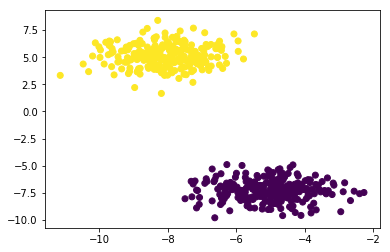

In [36]:
plt.scatter(X[:,0],X[:,1],c=df['cluster'])